In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../datasets/Iris/iris_dirty.csv',
                 header=None,
                 encoding='iso-8859-15',
                 names=['sepal length', 'sepal width', 'petal length', 'petal width', 'class'])


In [4]:
meanSepalWidth = pd.Series.mean(df[df['class']  == 'Iris-versicolor']['sepal width'])

In [5]:
df.loc[82,'sepal width'] = meanSepalWidth

In [6]:
df = df.drop(df.index[[100]])

In [7]:
df.loc[49,'class'] = 'Iris-setosa'

In [8]:
df['petal width'] = df.apply(lambda row:  pd.to_numeric(row['petal width'].replace(' mm', '')) / 10 ,axis='columns')

## Main part of step 6

In [9]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,6.191333,3.054533,3.758667,1.198667
std,4.338310,0.433205,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,58.000000,4.400000,6.900000,2.500000


In [10]:
df.groupby('class').describe()

petal length                                               \
                       count   mean       std  min  25%   50%    75%  max   
class                                                                       
Iris-setosa             50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor         50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica          50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                petal width        ...  sepal length       sepal width  \
                      count   mean ...           75%   max       count   
class                              ...                                   
Iris-setosa            50.0  0.244 ...          5.20   5.8        50.0   
Iris-versicolor        50.0  1.326 ...          6.30   7.0        50.0   
Iris-virginica         50.0  2.026 ...          7.05  58.0        50.0   

                                                                
                   mean       std  min    25%  50%    75%  max  
class                                                           
Iris-setosa      3.4180  0.381024  2.3  3.125  3.4  3.675  4.4  
Iris-versicolor  2.7716  0.313638  2.0  2.525  2.8  3.000  3.4  
Iris-virginica   2.9740  0.322497  2.2  2.800  3.0  3.175  3.8  

[3 rows x 32 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20f11c5710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f20edd19438>]], dtype=object)

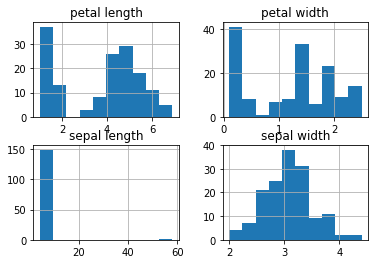

In [11]:
df.hist()

class
Iris-setosa        [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
Iris-versicolor    [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
Iris-virginica     [[Axes(0.125,0.551739;0.336957x0.328261), Axes...
dtype: object

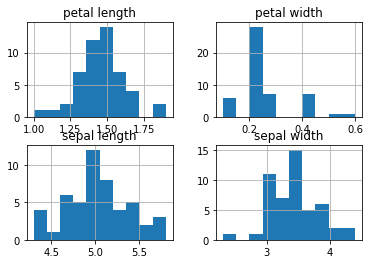

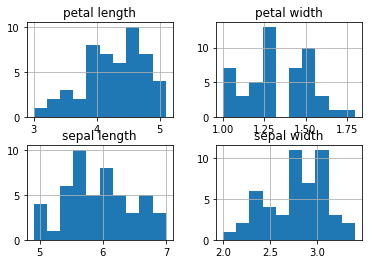

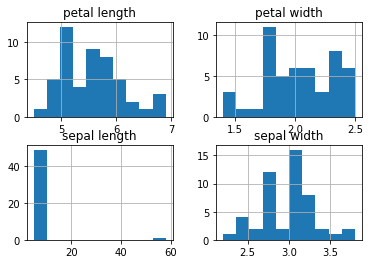

In [12]:
df.groupby('class').hist()

Iris-setosa             Axes(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    Axes(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              Axes(0.1,0.15;0.363636x0.340909)
dtype: object

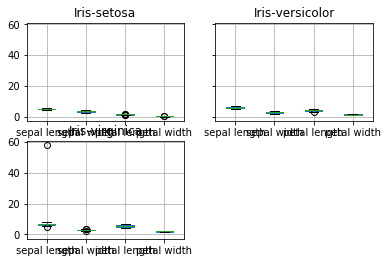

In [13]:
df.groupby('class').boxplot()

In [14]:
df[df['sepal length'] == 58]

,sepal length,sepal width,petal length,petal width,class
143,58.0,2.7,5.1,1.9,Iris-virginica


In [15]:
df.loc[143,'sepal length'] = 5.8

class
Iris-setosa        Axes(0.125,0.125;0.775x0.755)
Iris-versicolor    Axes(0.125,0.125;0.775x0.755)
Iris-virginica     Axes(0.125,0.125;0.775x0.755)
Name: sepal length, dtype: object

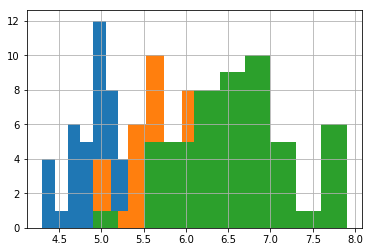

In [16]:
df.groupby('class')['sepal length'].hist()

Iris-setosa             Axes(0.1,0.559091;0.363636x0.340909)
Iris-versicolor    Axes(0.536364,0.559091;0.363636x0.340909)
Iris-virginica              Axes(0.1,0.15;0.363636x0.340909)
dtype: object

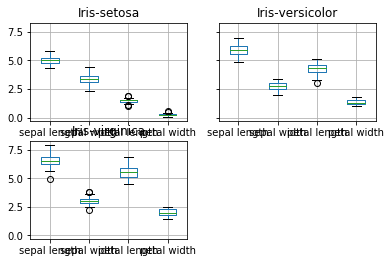

In [17]:
df.groupby('class').boxplot()

In [18]:
df.to_csv('../datasets/Iris/iris_cleaned.csv', index=False, header=True)